## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [4]:
len(merged_df["Mouse ID"])

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

get_duplicates = merged_df.groupby(["Mouse ID", "Timepoint"]).size().reset_index(name = 'count')
get_duplicates[get_duplicates["count"]>1]


,Mouse ID,Timepoint,count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df[merged_df["Mouse ID"] == "g989"]
len(duplicate_mouse)

13

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate = merged_df[merged_df["Mouse ID"] != "g989"]

In [8]:
# Checking the number of mice in the clean DataFrame.
len(remove_duplicate)

1880

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summarystatistics = remove_duplicate.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summarystatistics.style.format('{:.2f}')

## Bar and Pie Charts

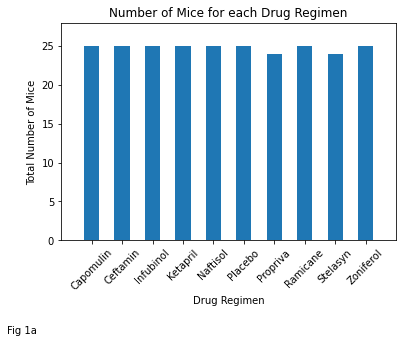

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
totalmice = remove_duplicate.groupby("Drug Regimen")["Mouse ID"].nunique()
totalmice.plot(kind ='bar')
plt.xticks(rotation=45)
plt.title('Number of Mice for each Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.ylim(0, 28)
plt.xlim(-1, 10)
plt.figtext(0,-0.2, "Fig 1a")
plt.show()

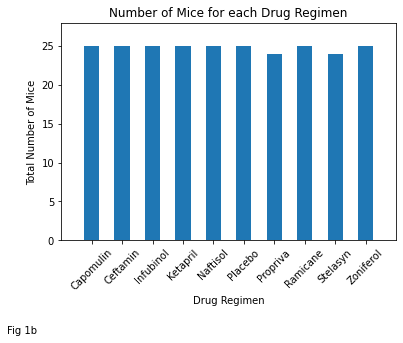

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(range(len(totalmice)), totalmice, tick_label = totalmice.index, width = 0.5)
plt.xticks(rotation=45)
plt.title('Number of Mice for each Drug Regimen')
plt.title('Number of Mice for each Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0, 28)
plt.xlim(-1, 10)
plt.figtext(0,-0.2, "Fig 1b")
plt.show()

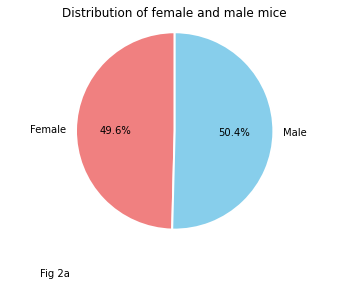

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexmice = remove_duplicate.groupby("Sex")["Mouse ID"].nunique()
sexmice.plot.pie(autopct='%.1f%%', colors = ["lightcoral", "skyblue"],startangle = 90,wedgeprops = {'linewidth': 2, 'edgecolor': "w"})
plt.title('Distribution of female and male mice')
plt.ylabel('')
plt.axis('equal')
plt.figtext(0.2,0, "Fig 2a")
plt.show()

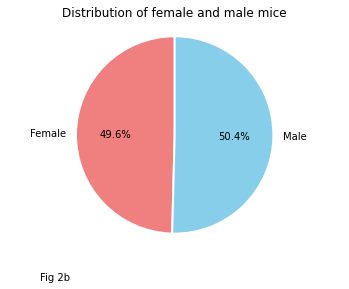

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sexmice.index
sizes = sexmice.values
colours = ["lightcoral", "skyblue"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, colors = colours, autopct='%.1f%%',startangle = 90,wedgeprops = {'linewidth': 2, 'edgecolor': "w"})
plt.title('Distribution of female and male mice', pad = 10)
ax1.axis('equal')
plt.figtext(0.2,0, "Fig 2b")
plt.show()

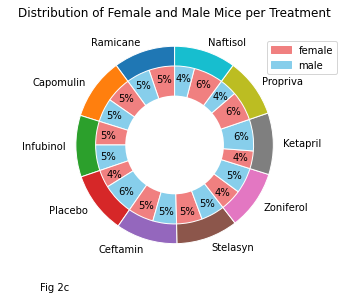

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = remove_duplicate['Drug Regimen'].unique().tolist()

# Pie plot showing distribution of female versus male mice across each regimen
sexperregimen = remove_duplicate.groupby(["Drug Regimen","Sex"])["Mouse ID"].nunique()

plt.pie(totalmice, startangle = 90, pctdistance = 0.88, radius = 1, wedgeprops = {'linewidth': 1, 'edgecolor': "w"}, labels=treatments)
sexcolours = ["lightcoral", "skyblue"]
plt.pie(sexperregimen, startangle = 90, pctdistance = 0.85, radius = 0.8, colors = sexcolours,wedgeprops = {'linewidth': 1, 'edgecolor': "w"}, autopct='%.f%%')
centre = plt.Circle((0,0), 0.5, fc = 'w')
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title('Distribution of Female and Male Mice per Treatment', pad=20)
fpatch = mpatches.Patch(color=sexcolours[0], label = 'female')
mpatch = mpatches.Patch(color=sexcolours[1], label = 'male')
plt.legend(handles=[fpatch,mpatch], loc = 1)
plt.axis('equal')
plt.figtext(0.2,0, "Fig 2c")
plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime = remove_duplicate.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedtime = pd.merge(maxtime, remove_duplicate, on = ["Mouse ID", "Timepoint"])
mergedtime[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', "Timepoint"]]

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a262,Placebo,70.717621,45
3,a275,Ceftamin,62.999356,45
4,a366,Stelasyn,63.440686,30
...,...,...,...,...
243,z435,Propriva,48.710661,10
244,z578,Ramicane,30.638696,45
245,z581,Infubinol,62.754451,45
246,z795,Naftisol,65.741070,45


In [17]:


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
ranges = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    subset = mergedtime[mergedtime['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([0.25,0.5,0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lowerbound = lower - (1.5 * iqr)
    upperbound = upper + (1.5 * iqr)
    ranges[drug] = [lowerbound,upperbound]
    print(lower, upper, iqr, lowerbound, upperbound)
ranges

31.56046955 40.65900627 9.098536719999998 17.912664470000003 54.30681135
32.37735684 40.1592203 7.781863460000004 20.70456164999999 51.83201549
54.04860769 65.52574285 11.477135160000003 36.83290494999999 82.74144559000001
52.94290169 68.13428817 15.191386480000006 30.15582196999999 90.92136789000001
48.72207785 64.29983003 15.577752179999997 25.355449580000002 87.66645829999999
52.476595617499996 69.1039444025 16.62734878500001 27.53557243999998 94.04496758000002
49.98830246 66.79415599 16.805853529999993 24.77952216500001 92.00293628499998
56.72009545 69.87225079 13.152155339999993 36.99186244000001 89.60048379999998
49.11973915 62.6893680725 13.569628922500002 28.76529576625 83.04381145625001
52.07951009 69.56362076 17.484110670000007 25.85334408499999 95.78978676500002


{'Ramicane': [17.912664470000003, 54.30681135],
 'Capomulin': [20.70456164999999, 51.83201549],
 'Infubinol': [36.83290494999999, 82.74144559000001],
 'Placebo': [30.15582196999999, 90.92136789000001],
 'Ceftamin': [25.355449580000002, 87.66645829999999],
 'Stelasyn': [27.53557243999998, 94.04496758000002],
 'Zoniferol': [24.77952216500001, 92.00293628499998],
 'Ketapril': [36.99186244000001, 89.60048379999998],
 'Propriva': [28.76529576625, 83.04381145625001],
 'Naftisol': [25.85334408499999, 95.78978676500002]}

In [18]:
finaltumor_series = pd.Series(tumor_vol, index = treatments)

In [19]:
outliers = {}
for drug in treatments:
    outlier = (finaltumor_series[drug] > ranges[drug][1]).sum() + (finaltumor_series[drug] < ranges[drug][0]).sum()
    outliers[drug] = outlier
    
outliers

{'Ramicane': 0,
 'Capomulin': 0,
 'Infubinol': 1,
 'Placebo': 0,
 'Ceftamin': 0,
 'Stelasyn': 0,
 'Zoniferol': 0,
 'Ketapril': 0,
 'Propriva': 0,
 'Naftisol': 0}

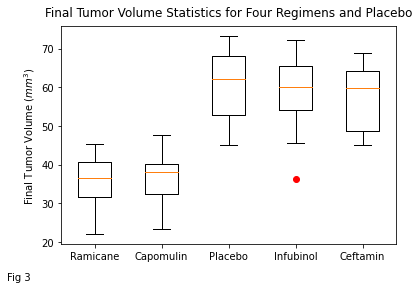

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finaltumor_series = pd.Series(tumor_vol, index = treatments)
fig1, ax1 = plt.subplots()
ax1.boxplot(finaltumor_series[["Ramicane", "Capomulin","Placebo","Infubinol","Ceftamin"]],0,"r")
ax1.set_xticklabels(finaltumor_series[["Ramicane", "Capomulin","Placebo","Infubinol", "Ceftamin"]].index)
plt.title("Final Tumor Volume Statistics for Four Regimens and Placebo", pad=10)
plt.ylabel("Final Tumor Volume ($mm^{3}$)")
plt.figtext(0,0, "Fig 3")
plt.show()

## Line and Scatter Plots

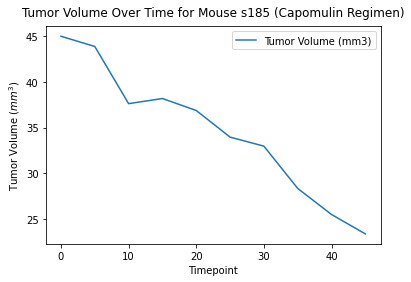

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = remove_duplicate[remove_duplicate["Drug Regimen"]=="Capomulin"][["Mouse ID", "Timepoint","Tumor Volume (mm3)", 'Weight (g)']]
Capomulin[Capomulin["Mouse ID"] == "s185"].plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.title("Tumor Volume Over Time for Mouse s185 (Capomulin Regimen)", pad = 10)
plt.ylabel("Tumor Volume ($mm^{3}$)")
plt.show()


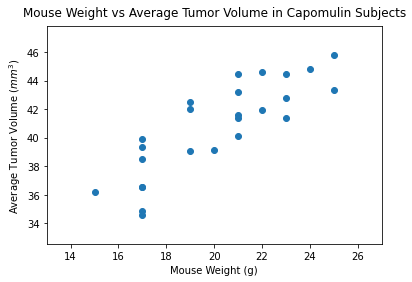

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#CapTumorMean = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)','Weight (g)'].mean()
x = Capomulin.groupby('Mouse ID')['Weight (g)'].mean()
y = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#CapTumorMean.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')
CapomulinChart = plt.scatter(x,y)
plt.title('Mouse Weight vs Average Tumor Volume in Capomulin Subjects', pad = 10)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^{3}$)')
plt.ylim(y.min()-2, y.max()+2)
plt.xlim(x.min()-2, x.max()+2)
plt.show()

## Correlation and Regression

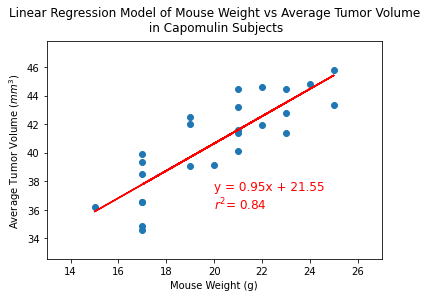

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x*slope + intercept
line = f"y = {slope:.2f}x + {intercept:.2f}\n$r^{2}$= {rvalue:.2f}" 
plt.scatter(x,y)
plt.plot(x, regression, "r-")
plt.annotate(line, (20,36), fontsize = 12, color = "red")
plt.title('Linear Regression Model of Mouse Weight vs Average Tumor Volume\n in Capomulin Subjects', pad = 10)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^{3}$)')
plt.ylim(y.min()-2, y.max()+2)
plt.xlim(x.min()-2, x.max()+2)
plt.show()


In [24]:
remove_duplicate.groupby("Drug Regimen").agg({"Weight (g)":["mean","median","var","std","sem"]})

Weight (g)                                      
                   mean median        var       std       sem
Drug Regimen                                                 
Capomulin     19.965217   20.5   7.466034  2.732404  0.180169
Ceftamin      27.398876   28.0   2.501016  1.581460  0.118535
Infubinol     27.196629   27.0   4.769028  2.183810  0.163684
Ketapril      27.861702   28.0   3.392536  1.841884  0.134333
Naftisol      27.166667   27.0   2.247748  1.499249  0.109930
Placebo       27.928177   28.0   3.378146  1.837973  0.136615
Propriva      27.135135   26.0   2.933995  1.712891  0.140799
Ramicane      19.679825   19.0  10.465318  3.235014  0.214244
Stelasyn      27.856354   28.0   2.701473  1.643616  0.122169
Zoniferol     27.692308   28.0   2.015300  1.419612  0.105229

<ipython-input-25-0c6768185dff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Weight (g)', 'Tumor Volume (mm3)'].mean()


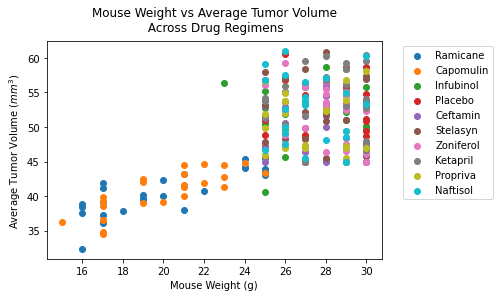

In [25]:
df = remove_duplicate.groupby(['Drug Regimen','Mouse ID'])['Weight (g)', 'Tumor Volume (mm3)'].mean()
df = df.droplevel(1)
for drug in treatments:
    x = df.loc[drug]["Weight (g)"]
    y = df.loc[drug]["Tumor Volume (mm3)"]
    plt.scatter(x,y, label=drug)
plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.title('Mouse Weight vs Average Tumor Volume\n Across Drug Regimens', pad = 10)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume ($mm^{3}$)')

plt.show()    



In [59]:
time = mergedtime[mergedtime['Timepoint'] == 45]

reachedend = time['Drug Regimen'].value_counts()



Capomulin    21
Ramicane     20
Zoniferol    14
Ceftamin     13
Naftisol     13
Ketapril     11
Stelasyn     11
Placebo      11
Infubinol     9
Propriva      7
Name: Drug Regimen, dtype: int64

In [45]:

# plt.bar(range(len(totalmice)), totalmice, tick_label = totalmice.index, width = 0.5)
# plt.xticks(rotation=45)
# plt.title('Number of Mice for each Drug Regimen')
# plt.title('Number of Mice for each Drug Regimen')
# plt.ylabel('Total Number of Mice')
# plt.xlabel('Drug Regimen')
# plt.ylim(0, 28)
# plt.xlim(-1, 10)
# plt.figtext(0,-0.2, "Fig 1b")
# plt.show()
totalmice

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

## Summary

The above analysis was conducted on data collected from Pymaceuticals latest screening trial for potential squamous cell carcinoma treatments using mice as test subjects. Tumor development was measured over a 45 day period in 10 drug regimens, 9 drugs including Capomulin were trialed as well as a placebo. Potential sources of error such as duplicated readings were removed after cleaning the original dataset, only one subject had to be removed from analysis. As see in fig 1(a and b) the 249 subjects were split evenly over the drug regimens. There was also an even distribution of male and female mice across the whole experiment (fig 2a and 2b) as well as in each regimen (2c).

### Tumor Volume Statistics
Analysis of the central tendecies of tumor volume in each drug trial showed that the average tumor volumes of mice in the Capomulin and Ramicane trials were lower compared to the other trials and also had a lower spread of tumor volumes.


